## K-Nearest Neighbors

### Câu 3:

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load the diabetes dataset
iris_X, iris_y = datasets.load_iris(return_X_y=True)

# Split train:test = 8:2
X_train, X_test, y_train, y_test = train_test_split(
    iris_X,
    iris_y,
    test_size=0.2,
    random_state=42
)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Predict and Evaluate test set
y_pred = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

### Câu 5:

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

# Paragraph A:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Paragraph D:
# Split train:test = 8:2
X_train, X_test, y_train, y_test = train_test_split(
    diabetes_X,
    diabetes_y,
    test_size=0.2,
    random_state=42
)

# Paragraph B:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Paragraph C:
# Build KNN model
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

### Câu 7:

In [5]:
import numpy as np
from datasets import load_dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer

# Load IMDB dataset
imdb = load_dataset("imdb")
imdb_train, imdb_test = imdb['train'], imdb['test']
                                            
# Convert text to vector using BoW
vectorizer = CountVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(imdb_train['text']).toarray()
X_test = vectorizer.transform(imdb_test['text']).toarray()
y_train = np.array(imdb_train['label'])
y_test = np.array(imdb_test['label'])
                            
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree')
knn_classifier.fit(X_train, y_train)

# predict test set and evaluate
y_pred = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

KeyboardInterrupt: 

## K-Means

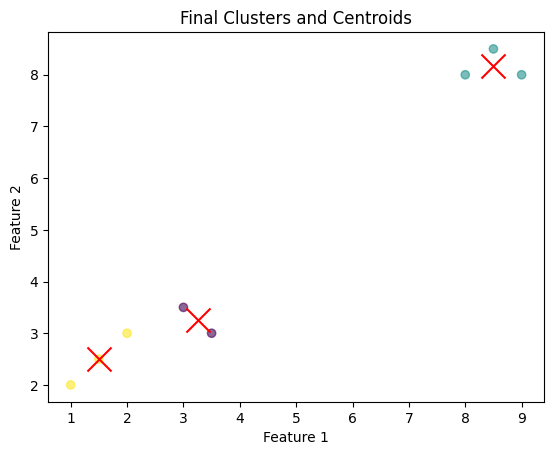

In [4]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = np.array([
    [2.0, 3.0, 1.5],
    [3.0, 3.5, 2.0],
    [3.5, 3.0, 2.5],
    [8.0, 8.0, 7.5],
    [8.5, 8.5, 8.0],
    [9.0, 8.0, 8.5],
    [1.0, 2.0, 1.0],
    [1.5, 2.5, 1.5]
])

class KMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
        self.clusters = None

    def initialize_centroids(self, data):
        np.random.seed(42)
        self.centroids = data[np.random.choice(data.shape[0], self.k, replace=False)]

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def assign_clusters(self, data):
        distances = np.array([[self.euclidean_distance(x, centroid) for centroid in self.centroids] for x in data])
        return np.argmin(distances, axis=1)

    def update_centroids(self, data):
        return np.array([data[self.clusters == i].mean(axis=0) for i in range(self.k)])

    def fit(self, data):
        self.initialize_centroids(data)

        for i in range(self.max_iters):
            self.clusters = self.assign_clusters(data)

            new_centroids = self.update_centroids(data)

            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids

        self.plot_final_clusters(data)

    def plot_clusters(self, data, iteration):
        plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], s=300, c='red', marker='x')
        plt.title(f"Iteration {iteration + 1}")
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.show()

    def plot_final_clusters(self, data):
        plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], s=300, c='red', marker='x')
        plt.title("Final Clusters and Centroids")
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()

kmeans = KMeans(k=3)
kmeans.fit(data)